In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb
import matplotlib.pyplot as plt
import random

In [41]:
nums = ['ㄱ','ㄴ','ㄷ','ㄹ','ㅁ','ㅂ','ㅅ','ㅇ','ㅈ','ㅊ','ㅋ','ㅌ','ㅍ','ㅎ','ㅏ','ㅑ','ㅓ','ㅕ','ㅗ','ㅛ','ㅜ','ㅠ','ㅡ','ㅣ','ㅐ','ㅒ','ㅔ','ㅖ','ㅢ','ㅟ']
finaldata = pd.DataFrame(columns=(['aX', 'aY', 'aZ', 'gX','gY','gZ','index','middle','ring','little','thumb']))
j=0
for num in nums:
    #print(num)
    path = '../data/자음모음/%s.csv'%num
    read_data = pd.read_csv(path, engine='python', encoding='cp949')
    #num.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data= read_data
    data.drop(data.columns[0], axis = 1, inplace= True)
    #print(num)
    #print(data)
    
    for k in data.columns:     #data.columns[w:] if you have w column of line description 
        data[k] = data[k].fillna(data[k].median())

    #data = data.filter(['little','ring','middle','index','thumb'])
    data.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata, data], sort=False, ignore_index=True)

#finaldata.to_csv('../data/data_set.csv')
   
print(finaldata)
#print(num)


    


         aX    aY    aZ    gX    gY    gZ index middle ring little thumb  \
0      0.58  0.74  0.41  1.77 -2.26 -6.71   310    236  468    413   219   
1      0.58  0.74  0.39  2.93  1.77 -8.30   309    236  464    413   220   
2      0.53  0.73  0.41 -5.25 -5.68 -4.82   310    235  467    412   223   
3      0.57  0.75  0.39  2.44 -6.41 -1.83   312    238  459    412   228   
4      0.57  0.76  0.39 -1.59 -3.17 -4.39   309    238  465    416   220   
...     ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   ...   
60915  0.50  0.81  0.30  3.91 -2.87 -1.71   437    208  282    358   364   
60916  0.52  0.80  0.27  0.55 -5.86 -1.53   445    209  282    359   365   
60917  0.56  0.82  0.26  0.24 -4.09 -0.49   438    209  281    356   366   
60918  0.57  0.82  0.25  0.92 -4.64 -2.38   445    207  283    359   367   
60919  0.54  0.78  0.27 -0.67 -3.78 -4.88   444    208  281    361   363   

       Character  
0            0.0  
1            0.0  
2            0.0  
3          

In [42]:
60920 / 2000

30.46

### 데이터 전처리
- 기존의 데이터를 머신러닝 알고리즘에 알맞은 데이터로 바꾸는 과정
- 모델이 생성된 이후에도 예측하고자 하는 새로운 데이터에도 적용하는 과정
- 전처리 과정을 통해 모델 학습의 성능을 높일 수 있음

In [6]:
finaldata = finaldata.astype({'Character':int})
finaldata
finaldata.to_csv('../data/all_data.csv')

In [ ]:
data_set = data_set.astype({'Character':int})
data_set
data_set.to_csv('../data/all_data.csv')

In [14]:
finaldata = pd.read_csv('../../data/final_data.csv', engine='python', encoding='cp949')

In [15]:
finaldata

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,number
0,0.03,0.91,0.40,2.14,-3.23,-0.92,409,458,189,240,199,0
1,0.02,0.91,0.40,0.73,-0.79,-1.59,416,455,192,243,195,0
2,0.01,0.91,0.41,-1.59,-1.83,-5.62,409,451,190,242,197,0
3,0.00,0.89,0.43,3.42,-4.70,-1.10,413,451,190,249,202,0
4,0.05,0.91,0.38,-1.46,-1.28,-0.06,410,458,190,243,199,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154995,-0.17,-0.98,-0.03,0.06,-2.32,-2.93,263,317,226,247,202,12
154996,-0.15,-0.98,-0.02,1.04,-2.81,-2.99,259,317,215,251,203,12
154997,-0.16,-0.98,-0.03,1.10,-4.09,-2.99,260,318,219,248,206,12
154998,-0.16,-0.98,-0.01,1.16,-2.81,-2.69,257,319,222,252,206,12


결측치 확인

In [4]:
finaldata.isnull().sum()

aX        0
aY        0
aZ        0
gX        0
gY        0
gZ        0
little    0
ring      0
middle    0
index     0
thumb     0
number    0
dtype: int64

In [5]:
# 중복 데이터 확인
finaldata.duplicated().sum()

0

In [23]:
finaldata.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [16]:
finaldata

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,number
0,0.03,0.91,0.40,2.14,-3.23,-0.92,409,458,189,240,199,0
1,0.02,0.91,0.40,0.73,-0.79,-1.59,416,455,192,243,195,0
2,0.01,0.91,0.41,-1.59,-1.83,-5.62,409,451,190,242,197,0
3,0.00,0.89,0.43,3.42,-4.70,-1.10,413,451,190,249,202,0
4,0.05,0.91,0.38,-1.46,-1.28,-0.06,410,458,190,243,199,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154995,-0.17,-0.98,-0.03,0.06,-2.32,-2.93,263,317,226,247,202,12
154996,-0.15,-0.98,-0.02,1.04,-2.81,-2.99,259,317,215,251,203,12
154997,-0.16,-0.98,-0.03,1.10,-4.09,-2.99,260,318,219,248,206,12
154998,-0.16,-0.98,-0.01,1.16,-2.81,-2.69,257,319,222,252,206,12


In [25]:
finaldata.to_csv('../data/data_set.csv')

In [26]:
finaldata

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.58,0.74,0.41,1.77,-2.26,-6.71,310,236,468,413,219,0
1,0.58,0.74,0.39,2.93,1.77,-8.30,309,236,464,413,220,0
2,0.53,0.73,0.41,-5.25,-5.68,-4.82,310,235,467,412,223,0
3,0.57,0.75,0.39,2.44,-6.41,-1.83,312,238,459,412,228,0
4,0.57,0.76,0.39,-1.59,-3.17,-4.39,309,238,465,416,220,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60915,0.50,0.81,0.30,3.91,-2.87,-1.71,437,208,282,358,364,29
60916,0.52,0.80,0.27,0.55,-5.86,-1.53,445,209,282,359,365,29
60917,0.56,0.82,0.26,0.24,-4.09,-0.49,438,209,281,356,366,29
60918,0.57,0.82,0.25,0.92,-4.64,-2.38,445,207,283,359,367,29


In [17]:
df = finaldata.sample(frac = 1).reset_index(drop=True)

In [18]:
df

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,number
0,-0.01,-0.98,0.17,3.11,-3.17,-4.03,284,311,428,462,348,15
1,0.64,-0.56,0.54,0.37,-2.32,-3.30,324,447,394,453,241,11
2,0.38,0.69,0.66,-2.81,-2.38,-5.92,379,370,401,384,259,10
3,0.61,0.72,0.33,1.40,-2.50,-6.59,418,326,399,345,254,10
4,1.00,-0.01,0.13,0.73,-2.87,-3.05,324,457,223,277,227,16
...,...,...,...,...,...,...,...,...,...,...,...,...
154995,0.11,-0.87,-0.48,0.37,-7.57,-4.88,314,444,369,264,190,19
154996,-0.20,-0.92,-0.28,1.34,-2.81,-1.89,330,455,218,298,226,14
154997,0.10,0.76,0.65,0.24,-3.91,-3.36,390,434,390,357,263,8
154998,0.23,-0.97,-0.13,3.36,-2.20,-2.50,223,290,205,453,377,18


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

In [19]:
test = df.copy()
y = df["number"].copy()
X = test.drop("number",axis = 1)

In [20]:
X

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,-0.01,-0.98,0.17,3.11,-3.17,-4.03,284,311,428,462,348
1,0.64,-0.56,0.54,0.37,-2.32,-3.30,324,447,394,453,241
2,0.38,0.69,0.66,-2.81,-2.38,-5.92,379,370,401,384,259
3,0.61,0.72,0.33,1.40,-2.50,-6.59,418,326,399,345,254
4,1.00,-0.01,0.13,0.73,-2.87,-3.05,324,457,223,277,227
...,...,...,...,...,...,...,...,...,...,...,...
154995,0.11,-0.87,-0.48,0.37,-7.57,-4.88,314,444,369,264,190
154996,-0.20,-0.92,-0.28,1.34,-2.81,-1.89,330,455,218,298,226
154997,0.10,0.76,0.65,0.24,-3.91,-3.36,390,434,390,357,263
154998,0.23,-0.97,-0.13,3.36,-2.20,-2.50,223,290,205,453,377


In [21]:
y

0         15
1         11
2         10
3         10
4         16
          ..
154995    19
154996    14
154997     8
154998    18
154999     5
Name: number, Length: 155000, dtype: int64

### 데이터 셔플

In [6]:
finaldata_shuffled=finaldata.iloc[np.random.permutation(finaldata.index)].reset_index(drop=True)
finaldata_shuffled

,Unnamed: 0,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,4802,0.93,-0.33,0.20,1.46,-1.65,-3.36,286,407,459,331,263,2
1,25911,-0.10,-0.96,0.23,1.40,-1.83,-3.30,257,202,293,311,232,12
2,35226,0.93,-0.36,0.14,-0.24,-4.46,-1.65,448,402,284,215,343,17
3,24615,-0.12,-0.92,0.39,1.04,4.94,-8.12,240,189,270,303,234,12
4,31316,-0.02,-0.94,0.30,5.25,-2.08,-1.65,459,419,263,181,342,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60915,22497,0.88,-0.32,0.37,-0.55,-1.53,-3.17,469,421,456,340,279,11
60916,37823,0.20,-0.97,-0.07,0.31,-3.05,-3.60,450,209,288,224,376,18
60917,28765,0.10,-0.96,0.08,1.53,6.23,-3.42,446,202,264,206,351,14
60918,28275,0.17,-0.98,0.19,0.92,-3.91,-0.85,458,201,266,212,354,14


테스트 셋 분리

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [24]:
test_set.head()

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,number
58619,0.93,-0.34,-0.20,-0.18,-3.42,-2.99,393,468,225,279,196,1
6660,0.38,0.78,0.60,15.81,8.12,-2.69,379,318,405,349,255,10
42266,0.79,-0.53,-0.26,18.80,5.31,1.71,198,249,206,253,399,13
142944,0.94,-0.32,0.04,0.12,-3.17,-2.50,304,458,363,243,183,17
119316,-0.33,-0.92,0.17,2.20,-3.48,-2.87,264,262,190,241,193,12


In [25]:
suhwa = train_set.copy()
suhwa

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,number
80583,0.64,-0.52,0.57,-1.40,-2.38,-1.34,342,444,417,457,270,11
11124,0.04,-0.99,-0.06,0.55,-3.23,-2.69,329,471,375,259,205,15
26845,0.79,-0.62,-0.02,0.73,-3.54,-2.62,327,279,223,262,199,13
81415,-0.14,-0.98,0.01,0.06,-3.05,-2.81,217,272,384,469,311,15
130220,0.82,-0.57,-0.01,1.83,-2.32,-3.60,304,280,219,267,228,13
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.18,0.81,0.58,1.10,-2.93,-2.50,415,447,397,440,232,9
103694,-0.27,-0.94,0.21,0.92,-2.14,-0.06,293,362,257,255,212,4
131932,0.97,-0.18,-0.06,-2.69,-16.97,4.21,317,455,198,266,226,16
146867,-0.11,-0.98,-0.07,4.88,-2.32,-1.04,447,486,396,353,362,7


In [28]:
X = suhwa.drop("number", axis = 1)
y = suhwa["number"].copy()

In [29]:
X

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
80583,0.64,-0.52,0.57,-1.40,-2.38,-1.34,342,444,417,457,270
11124,0.04,-0.99,-0.06,0.55,-3.23,-2.69,329,471,375,259,205
26845,0.79,-0.62,-0.02,0.73,-3.54,-2.62,327,279,223,262,199
81415,-0.14,-0.98,0.01,0.06,-3.05,-2.81,217,272,384,469,311
130220,0.82,-0.57,-0.01,1.83,-2.32,-3.60,304,280,219,267,228
...,...,...,...,...,...,...,...,...,...,...,...
119879,0.18,0.81,0.58,1.10,-2.93,-2.50,415,447,397,440,232
103694,-0.27,-0.94,0.21,0.92,-2.14,-0.06,293,362,257,255,212
131932,0.97,-0.18,-0.06,-2.69,-16.97,4.21,317,455,198,266,226
146867,-0.11,-0.98,-0.07,4.88,-2.32,-1.04,447,486,396,353,362


In [30]:
# Importing the required packages
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [32]:
cross_val_score_array1 = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
print(cross_val_score_array1)
print("acc/t", np.mean(cross_val_score_array1))
print("acc-stdev/t", cross_val_score_array1.std())

[0.99846774 0.99758065 0.99758065 0.99814516 0.99725806 0.99758065
 0.99725806 0.99782258 0.9975     0.99790323]
acc/t 0.997709677419355
acc-stdev/t 0.0003628136090064949


In [33]:
pred = clf.predict(X_valid)

In [34]:
clf

RandomForestClassifier(random_state=42)

In [36]:
X_valid

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
119710,0.21,0.77,0.61,9.64,0.67,-4.70,290,383,421,390,421
93436,0.28,-0.95,0.11,0.43,-7.14,-2.81,253,297,248,459,333
107078,0.88,-0.46,-0.12,1.65,-2.99,-2.26,357,460,230,292,209
132800,0.88,-0.46,0.11,-0.06,-2.81,-4.03,302,460,360,249,200
90662,0.16,0.84,0.49,-1.95,-2.08,-3.78,316,423,205,274,353
...,...,...,...,...,...,...,...,...,...,...,...
86027,0.85,-0.52,-0.08,1.65,-2.14,-2.87,311,425,185,255,195
86888,0.05,-0.97,-0.23,0.92,-3.17,-2.56,319,442,207,254,202
123796,0.08,-0.96,-0.25,0.00,-3.78,-2.38,318,414,200,268,375
105664,-0.28,-0.92,-0.24,-4.03,-3.05,-1.04,307,446,355,255,375


In [37]:
clf.feature_importances_

array([0.12081606, 0.11883777, 0.08217791, 0.00209056, 0.00202225,
       0.00198717, 0.1340784 , 0.1290264 , 0.13862404, 0.13130426,
       0.13903519])

In [38]:
print(accuracy_score(y_valid, pred))

0.9981451612903226


In [39]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[3200,    0,    0,    0,    0,    1,    1,    0,    1,    1,    0,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 3203,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    2,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 3142,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   17,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    2,    0,    0,    0],
       [   0,    0,    1, 3193,    0,    0,    0,    0,    0,    0,    0,
          15,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3194,    0,    0,    0,    0,    0,    0,
           0,    8,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        

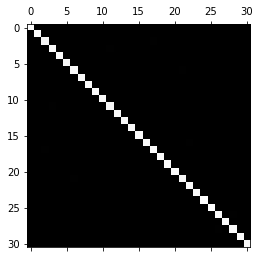

In [40]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()